## Automatic extraction and classification of observational sentences in "Astronomia nova" 
 Gerd Graßhoff$^{(1,2)}$, Mohammad Yeghaneh$^{(2)}$

1: Max-Planck-Institute for the History of Science, Berlin

2: Humboldt University, Berlin

Date: November 2019

Kepler's "New Astronomy (Astronomia Nova)" was completed and published in Linz in 1609. Buried deep in this, at times very mystical book, is Kepler's first formulation of his first and second laws of planetary motion, which in modern parlance can be stated as follows:
*  Planetary orbits are ellipses, with the Sun located at one focus;
*  Planets move along their elliptical orbit with a speed such that a line segment joining the planet to the Sun sweeps equal surface areas in equal time intervals.

At the same time he reconceptualized "oppositions" as based upon the observed, rather than "average," position of the Sun, Kepler analyzed Brahe's individual **observations** of Mars for potential errors of various other kinds. with this introduction observations, sentiments play an important role in tracking the knowledge. This motivates us to:  

- extract the explicit observational sentences using the book custom NER model
- provide two models to classify the explicit observational sentences of the book using machine learning #ref

In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc,confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import random 



In [2]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


## Resources

### Import resources

In [4]:
df=pd.read_json('../data/dfObsV04A02.json');
df=df.sort_index();


Sample of the first sentences of the book in the dataframe format 

In [5]:
df.head()

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
0,Chapter 1,1,Chapter 1,0,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,{'act': 'considered'},[],"[0, 0, 0]",0


 Sample of the last sentences of the book in the dataframe format 

In [6]:
df.tail()

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"". Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",1603,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"". Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",1603,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",1604,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",1604,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time o

In [7]:
df.iloc[980:990]

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
980,"On an inserted sheet here, an attempt was made to correct for a refraction of two minutes.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,{'act': 'made'},"[[refraction, ASTR]]","[0, 0, 0]",0
981,"This was, I think, first trial of the theory of refraction then being developed.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'was', 'subject': 'this'}","[[refraction, ASTR]]","[0, 0, 0]",0
982,"Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'followed', 'subject': 'he', 'obj': 'the observed value unchanged'}","[[observed, ASTR]]","[0, 0, 0]",0
983,"Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'was', 'subject': 'it'}","[[refraction, ASTR], [longitudinal, ASTR], [parallax, ASTR]]","[0, 0, 0]",0
984,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.",10,"On 

# Distribution of explicit observational sentences 

here we extract the explicit observational sentences using custom Name Entity Recognition that we provided using deep learning. We can see the sentences in the corresponding paragraph. As you see we integrated data with such contributes as follows:

- **Sentence**  
- **Chapter**
- **Paragraph**
- **ParaIndex**
- **ASO**
- **Entities**
- **FNER**
- **Label**

In [8]:
df_obs=df[df.Label==1]

In [9]:
dfChobs=set(df_obs["Chapter"])
dfChobs

{10.0,
 11.0,
 12.0,
 13.0,
 15.0,
 22.0,
 24.0,
 26.0,
 42.0,
 51.0,
 61.0,
 62.0,
 65.0,
 69.0}

# Data preparation for visualization

In [10]:
a=[]
for i in  dfChobs:
    Obch=df_obs[df_obs.Chapter == i].shape[0]
    a.append(Obch)

Text(0.5, 1.0, 'Distribution of observation over different chapters')

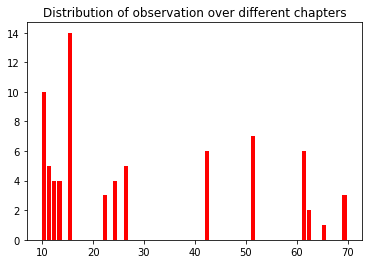

In [11]:
plt.bar(list(dfChobs),a,color="r",align='edge', width=.8)

plt.title("Distribution of observation over different chapters")


## Distribution of explicit observational Sentences

In [12]:
X=list(df["Sentence"])
y=np.array(list(df["Label"]))

In [13]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [14]:
count

{0: 6625, 1: 74}

Text(0.5, 1.0, 'Distribution of samples over different classes')

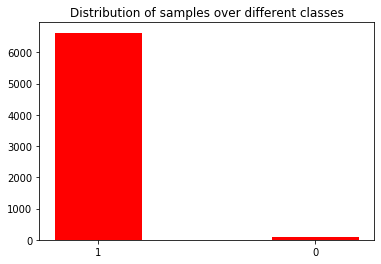

In [15]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [16]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [17]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier

#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [18]:
trial_05

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

# Explicit observational sentences using custom NER in the paragraph

In [19]:
X_Obs=df.loc[df.Label==1]
X_Obs=X_Obs[["Sentence","Paragraph"]]


In [20]:
X_Obs.head(10)


,Sentence,Paragraph
967,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows.","On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows. Now this observation is distant and isolated. It was reduced to the moment of opposition using the diurnal motion from the Prutenic Tables ^3."
977,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6.","On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax."
984,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.","On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8. The diurnal motion, by comparison of observations, was 24’ 15”. The moment of opposition followed at 19h 35m, 7 hours and 35 minutes later. To this period belongs 7’ 41” of diurnal motion westward. Therefore, at the designated moment, it would have been at 21° 10’ 30” Leo, which is what was accepted. There is no mention of parallax. Nothing had to be done about refraction, because Mars was high and at mid-sky. I therefore find the bit of advice in the table about refraction (properly) ignored."
992,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo.","On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo. This they kept in the table, but changed the time to 17h 22m. The difference of 1h 48m multiplied by a diurnal motion of 24’ gives the same number of minutes and seconds (that is, 1’ 48”), no more. It therefore should have been 25° 8’ 32” Virgo, which also approaches nearer the point opposite the sun. The difference is of practically no importance ^9."
997,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10.","On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10. There remain 1h 30m until the designated moment of opposition, which, for a diurnal motion of 22', bring the planet back 1’ 22”, so as to be at 3° 55’ 49”. They took the value of 3° 58’ 10”. The former is closer to the sun’s mean position."
1001,"On 1591 June 6 at 12h 20m, Mars is placed at 27° 15’ Sagittarius ^11.","On 1591 June 6 at 12h 20m, Mars is placed at 27° 15’ Sagittarius ^11. There remained 2 days 4 hours and 5 minutes until the designated moment. In four days it was found to be moved forward 1° 12’ 47”. Therefore, to 2d 4h 5m correspond 39’ 29”. Consequently, at that moment Mars was at 26° 35’ 31” Sagittarius. There is no need to consider any horizontal variations in longitude, since Mars is at mid-sky and at the beginning of Capricorn. The table has 26° 32’ Sagittarius."
1008,"On 1593 24 August at 10h 30m they report Mars as being at 12° 38’ Pisces12 with an observed diurnal motion of 16’ 45”, and this near the nonagesimal13 where ther

In [21]:
Y_Obs=df.loc[df.Label==1]
Y_Obs=Y_Obs.Label
Y_Obs=list(Y_Obs)

# Non-observational sentences  in the pragraph

In [22]:
X_NObs=df.loc[df.Label==0]
X_NObs=X_NObs[["Sentence","Paragraph"]]

In [23]:
X_NObs.head(10)

,Sentence,Paragraph
0,Chapter 1,Chapter 1
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.","On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality."
2,The testimony of the ages confirms that the motions of the planets are orbicular.,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
5,"However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
6,It is just this from which astronomy arose among humans.,"It is just this from which astronomy arose among humans. Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the positions and appearances of those stars at any given time may be predicted."
7,"Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the positions and appearances of those stars at any given time may be predicted.","It is just this from which astronomy arose among humans. Astronomy's aim is considered to be to show why the sta

In [24]:
Y_NObs=df.loc[df.Label==0]
Y_NObs=Y_NObs.Label
Y_NObs=list(Y_NObs)

In [25]:
x_obs = X_Obs.loc[0:, 'Sentence'].values
x_nobs = X_NObs.loc[0:73, 'Sentence'].values


In [26]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,number_of_samples);
len(Y_NObs)

74

In [27]:
y=Y_NObs+Y_Obs

In [28]:
X1=x_nobs.tolist()

In [29]:
X2=x_obs.tolist()

In [30]:
X=X1+X2

# Distribution of Samples  after downsampling

In [31]:
category=Counter(y)
count=dict(category)

Text(0.5, 1.0, 'Distribution of samples over different classes')

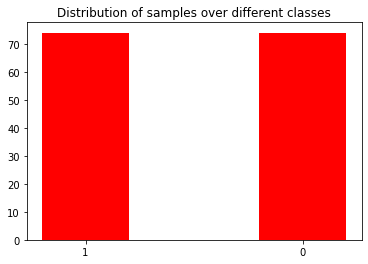

In [32]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [33]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

# 1- Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [35]:
cross_validation_accuracy(trial_06,X,y,cv=10)

[1.         1.         1.         1.         1.         0.85714286
 0.85714286 0.92857143 0.92857143 1.        ]
Accuracy of : 0.957 ± 0.114


In [36]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.97      0.95      0.96        74

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148



In [37]:
print(cm)

[[72  4]
 [ 2 70]]


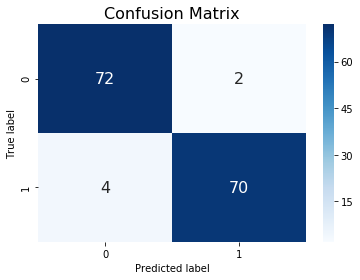

In [38]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [39]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


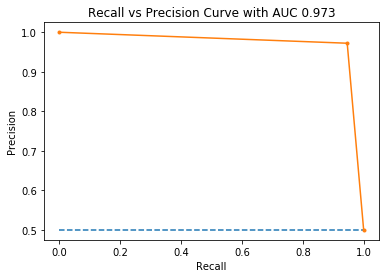

AUC: 0.973


In [40]:
plot_pr(recall, precision)

## 1-SGD

In [41]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [42]:
y_pred=trial_05.predict(X_test)

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Colorful_Confusion_Matrix(y, y_test, y_pred)


[[7 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [44]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.92857143]
Accuracy of : 0.993 ± 0.043


In [45]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.99      1.00      0.99        74

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

[[73  0]
 [ 1 74]]


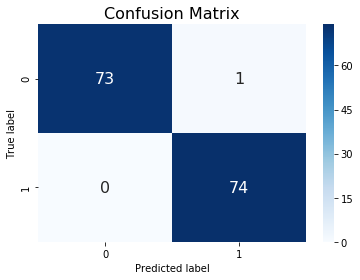

In [46]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [47]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


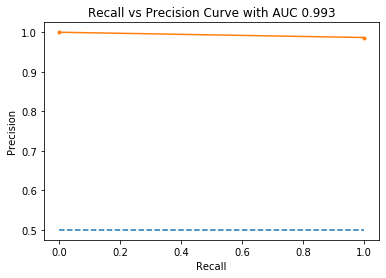

AUC: 0.993


In [48]:
plot_pr(recall, precision)

##  Save the down sampled model

import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)